In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Reading Data from csv files
train = pd.read_csv("/content/drive/My Drive/DL Projects/fashion-mnist/fashion-mnist_train.csv")
test = pd.read_csv("/content/drive/My Drive/DL Projects/fashion-mnist/fashion-mnist_test.csv")

In [3]:
train.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0


In [0]:
train_X = train.drop(labels = "label",axis = 1)
train_Y = train["label"]

In [0]:
# Normalization
train_X = train_X / 255.0
test = test / 255.0

In [41]:
test = test.drop(labels = "label", axis=1)
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,0.000000,0.133333,0.113725,0.027451,0.000000,0.043137,0.094118,0.000000,0.000000,0.011765,0.011765,0.003922,0.0,0.003922,0.003922,0.0,0.0,0.0,0.0,0.0,0.015686,0.000000,0.0,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.172549,...,0.949020,0.960784,0.878431,0.960784,0.917647,0.000000,0.011765,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.145098,0.270588,0.368627,0.482353,0.498039,0.541176,0.541176,0.556863,0.568627,0.529412,0.490196,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.819608,0.745098,0.709804,0.588235,0.666667,0.756863,0.705882,0.858824,0.019608,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.094118,0.921569,...,0.972549,0.933333,0.313725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.682353,0.913725,0.607843,0.000000,0.254902,0.921569,0.847059,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047059,0.368627,0.266667,0.054902,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.149020,0.415686,0.368627,0.349020,0.368627,0.266667,0.007843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.341176,0.047059,0.101961,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.180392,0.196078,0.113725,0.000000,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,0.831373,0.541176,0.588235,0.662745,0.643137,0.690196,0.792157,1.000000,0.717647,0.101961,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.0,0.000000,0.505882,0.866667,1.000000,1.000000,0.843137,0.721569,...,1.000000,1.000000,0.996078,0.988235,1.000000,0.396078,0.768627,0.996078,0.988235,0.392157,0.0,0.0,0.0,0.0,0.0,0.658824,0.909804,0.882353,0.000000,0.160784,0.674510,0.576471,0.580392,0.600000,0.607843,0.572549,0.537255,0.552941,0.560784,0.537255,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.145098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.082353,0.800000,0.921569,0.921569,...,0.000000,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.007843,0.270588,0.000000,0.007843,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [0]:
# Reshaping values for image format
test = test.values.reshape(-1,28,28,1)

In [0]:
train_X = train_X.values.reshape(-1,28,28,1)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
# it will change all the values from 0-9
numclasses = len(np.unique(train_Y))
train_Y = to_categorical(train_Y, numclasses)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Spliting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(train_X, train_Y , test_size = 0.2, random_state = 2)

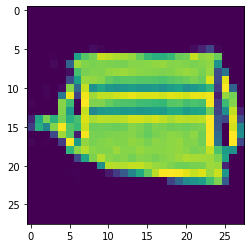

In [30]:
# plotting a random image just to check
plt.imshow(X_train[4][:,:,0])

In [31]:
%%time
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import  Flatten
from tensorflow.keras.layers import  Convolution2D
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.layers import  Dropout
from tensorflow.keras.layers import  Activation

CPU times: user 35 µs, sys: 3 µs, total: 38 µs
Wall time: 40.1 µs


In [14]:
# Building the CNN

%%time
model = Sequential()


model.add(Convolution2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (28,28,1)))
model.add(Convolution2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Convolution2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(Convolution2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPooling2D(strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
CPU times: user 151 ms, sys: 1.91 ms, total: 153 ms
Wall time: 179 ms


In [0]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset\n",
            samplewise_center=False,  # set each sample mean to 0\n",
            featurewise_std_normalization=False,  # divide inputs by std of the dataset\n",
            samplewise_std_normalization=False,  # divide each input by its std\n",
            zca_whitening=False,  # apply ZCA whitening\n",
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)\n",
            zoom_range = 0.1, # Randomly zoom image \n",
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)\n",
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)\n",
            horizontal_flip=False,  # randomly flip images\n",
            vertical_flip=False)  # randomly flip images
        

In [18]:
# Fitting the model to dataset

%%time
model.fit_generator(datagen.flow(X_train,Y_train, batch_size = 128), validation_data=(X_test, Y_test), steps_per_epoch = X_train.shape[0], epochs = 1)

48000/48000 [==============================] - 1626s 34ms/step - loss: 0.2537 - acc: 0.9059 - val_loss: 0.1904 - val_acc: 0.9335
CPU times: user 32min 13s, sys: 2min 25s, total: 34min 38s
Wall time: 27min 13s


In [0]:
# Model saved with h5 format
model.save("fashion-mnist.h5")

In [32]:
# Loading Model

from tensorflow.keras.models import load_model
model = load_model("fashion-mnist.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
from tensorflow.keras.preprocessing import image

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array

In [64]:
# Dict to change labels from numbers to names

labels = {
    '0' : 'T-shirt/top',
    '1' :  'Trouser',
    '2' :  'Pullover',
    '3' :  'Dress',
    '4' :  'Coat',
    '5' :  'Sandal',
    '6' :  'Shirt',
    '7' :  'Sneaker',
    '8' :  'Bag',
    '9' :  'Ankle boot',
}

ERROR! Session/line number was not unique in database. History logging moved to new session 60


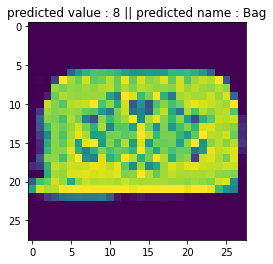

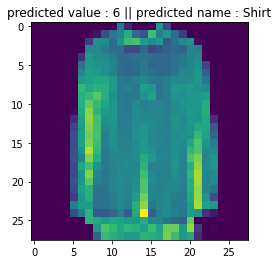

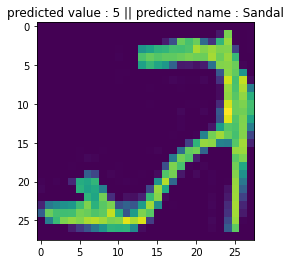

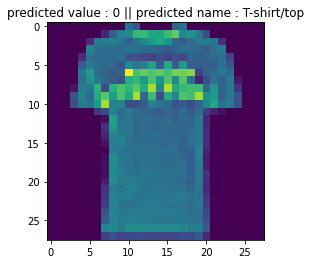

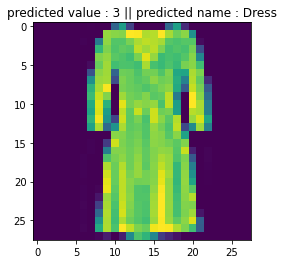

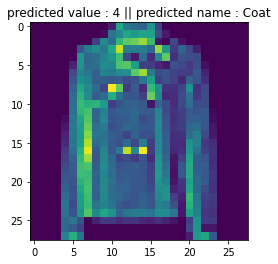

In [71]:
# Predicting and plotting the images with their predicted values and names together

testing = test[6:12,:]
for i,img in enumerate(testing):
    image = img[:,:,0]
    im = img_to_array(image)
    im = np.expand_dims(im.copy(), axis=0)
    preds = model.predict(im)
    j = preds.argmax(axis=1)[0]
    label = labels[str(j)]
    plt.title("predicted value : %s || predicted name : %s" % (j ,label))
    plt.imshow(image)
    plt.show()